In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Main

In [0]:
class LogisticRegression(object):
    
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.cost_per_iteration = []
        
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        
        # gradient descent

        for _ in range(self.epochs):
            # forward propagation
            Z = np.dot(X, self.weights) + self.bias
            A = self._sigmoid(Z)
            
            cost = (-1/m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
            
            # backward propagation
            dw = (1 / m) * np.dot(X.T, (A - y))
            db = (1 / m) * np.sum(A - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            self.cost_per_iteration.append(cost)
    
    def predict(self, X):
        Z = np.dot(X, self.weights) + self.bias
        A = self._sigmoid(Z)
        y_predicted_cls = [1 if i >= 0.5 else 0 for i in A]
        return y_predicted_cls

Testing

In [3]:
cols = ["Pregnancies" ,"Glucose" ,"BloodPressure" ,"SkinThickness" ,"Insulin" ,"BMI" ,"DiabetesPedigreeFunction" ,"Age" ,"Outcome"]
url = "https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv"

diabetes_data = pd.read_csv(url, skiprows=9, header=None, names=cols)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.shape

(768, 9)

In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
# X = diabetes_data[['Glucose','BMI']]
X = diabetes_data[cols[:-1]]
y = diabetes_data[cols[-1]]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [0]:
# Standardizating data to have zero mean and unit  std. deviation

means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
X_train = (X_train - means)/stds
X_test = (X_test - means)/stds

In [0]:
def getAccuracy(predicted, actual):
    assert len(predicted) == len(actual)
    accuracy = np.sum(predicted == actual)
    return (accuracy/len(actual)) * 100.0

In [12]:
epochs = 200
learning_rate = 1e-1

logisticRegression = LogisticRegression(learning_rate=learning_rate, epochs=epochs)
logisticRegression.fit(X_train, y_train)
predictions = logisticRegression.predict(X_test)

print(f"Accuracy achieved: {round(getAccuracy(predictions, y_test), 2)}")

Accuracy achieved: 74.68


Text(0.5, 1.0, 'Cost Vs. Iteration')

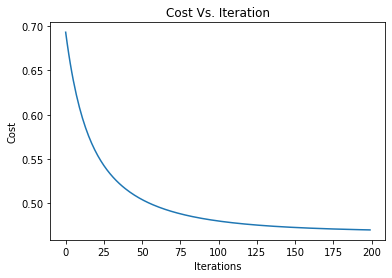

In [13]:
plt.plot(range(epochs), logisticRegression.cost_per_iteration)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Vs. Iteration")

In [14]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

[[79 20]
 [19 36]]


In [15]:
def precision_recall(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)    
    tp = cm[1,1]
    fp = cm[0,1]
    fn = cm[1,0]
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)    
    return prec, rec

precision, recall = precision_recall(y_test, predictions)
print('Precision: %f Recall %f' % (precision, recall))

Precision: 0.642857 Recall 0.654545


In [0]:
# from sklearn.metrics import precision_score, recall_score

# precision_score(y_test, predictions)
# recall_score(y_test, predictions)

In [0]:
# roc curve 
from sklearn.metrics import roc_curve

fpr, tpr, thresholdsh = roc_curve(y_test, predictions)

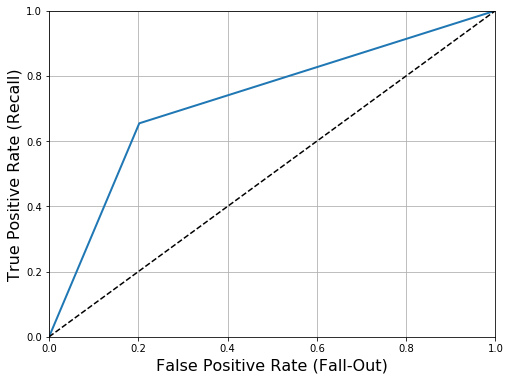

In [18]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

In [19]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, predictions)

0.7262626262626263